## The Program for International Student Assessment (PISA) 
## by (Roman Basulaiman)

## Preliminary Wrangling



> The Program for International Student Assessment (PISA) is a system for international assessments. This system  compare students learning outcomes. PISA measure the performance of 15-year-old students in mathematics, science, and reading literacy every 3 years. PISA was first implemented in 2000 in 32 countries. It has since grown to 65 education systems in 2012.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from matplotlib import rcParams

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [6]:
cd /Users/Roman/anaconda3/envs/Udacity_2019/Data Vis/Data

/Users/Roman/anaconda3/envs/Udacity_2019/Data Vis/Data


In [7]:
Read_PISA_df=pd.read_csv('pisa2012.csv',encoding='latin1')

/Users/Roman/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Read_PISA_df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
47579,47580,Belgium,560000,BEL0329,OECD,Belgium,207,6193,9,22.0,...,0.6464,1.3536,0.6464,1.3536,1.3536,1.3536,9,2,0.0085,22NOV13
216255,216256,Croatia,1910000,HRV0005,Non-OECD,Croatia,153,4685,9,1.0,...,14.2710,4.6951,4.7512,14.0794,14.2535,14.0794,80,2,0.2076,22NOV13
327911,327912,Mexico,4840000,MEX1543,OECD,Mexico,527,12209,10,7.0,...,188.8518,188.8518,188.8518,188.8518,62.9506,188.8518,50,2,0.0949,22NOV13
249987,249988,Italy,3800000,ITA1801,OECD,Italy,366,9398,10,1.0,...,1.2748,1.2748,1.2748,1.2748,3.8244,3.8244,49,1,0.0049,22NOV13
249088,249089,Italy,3800000,ITA0802,OECD,Italy,331,8499,10,2.0,...,14.3944,30.1396,14.3944,14.3944,30.1396,30.1396,12,2,0.0427,22NOV13


> The data set has uninformative cloumn name, Data dictionary will assest in this 

In [9]:
Dict_df=pd.read_csv('pisadict2012.csv' , encoding='latin1') 

In [10]:
Dict_df.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


> There are 636 columns and I'm not going to use all of it so I will delete the unnecessary columns 

In [11]:
PISA_df=Read_PISA_df[['CNT','STIDSTD','ST01Q01','ST03Q01','ST03Q02','ST04Q01','ST05Q01','AGE','ST07Q01','ST07Q02','ST07Q03','ST13Q01','ST17Q01','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE','COBN_F','COBN_M','GRADE']]

>Rename columns 

In [12]:
PISA_df.rename(columns={'CNT':'country',
                        'STIDSTD':'Student_ID',
                        'ST01Q01':'International_Grade',
                        'ST03Q01':'B_Month',
                        'ST03Q02':'B_Year',
                        'ST04Q01':'Gender',
                        'ST05Q01':'Attend',
                        'ST07Q01':'Repeat_1',
                        'ST07Q02':'Repeat_2',
                        'ST07Q03':'Repeat_3',
                        'ST13Q01':'Mother_Schooling',
                        'ST17Q01':'Father_Schooling',
                        'COBN_M':'Mother_Contry_of_Birth',
                        'COBN_F':'Father_Contry_of_Birth'},inplace=True)

/Users/Roman/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
PISA_df.head(10)

,country,Student_ID,International_Grade,B_Month,B_Year,Gender,Attend,AGE,Repeat_1,Repeat_2,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Father_Contry_of_Birth,Mother_Contry_of_Birth,GRADE
0,Albania,1,10,2,1996,Female,No,16.17,"No, never","No, never",...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,0.0
1,Albania,2,10,2,1996,Female,"Yes, for more than one year",16.17,"No, never","No, never",...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,0.0
2,Albania,3,9,9,1996,Female,"Yes, for more than one year",15.58,"No, never","No, never",...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,-1.0
3,Albania,4,9,8,1996,Female,"Yes, for more than one year",15.67,"No, never","No, never",...,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,-1.0
4,Albania,5,9,10,1996,Female,"Yes, for more than one year",15.50,"No, never","No, never",...,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,-1.0
5,Albania,6,9,9,1996,Female,No,15.58,"No, never",NaN,...,335.3617,219.3924,384.3156,358.2059,405.7628,403.8978,325.5688,Albania,Albania,-1.0
6,Albania,7,10,3,1996,Female,"Yes, for more than one year",16.08,"No, never","No, never",...,338.3006,373.2503,508.1499,462.4580,499.7576,519.3398,466.1880,Albania,Albania,0.0
7,Albania,8,10,6,1996,Male,"Yes, for more than one year",15.83,"No, never","No, never",...,535.6811,582.9958,611.2831,596.3633,554.4013,513.3719,519.8993,Albania,Albania,0.0
8,Albania,9,9,10,1996,Female,No,15.50,NaN,NaN,...,391.7577,278.9657,373.0325,317.0832,376.7624,409.3995,382.3573,Albania,Albania,-1.0
9,Albania,10,10,8,1996,Female,"Yes, for one year or less",15.67,"No, never","No, never",...,450.5366,323.4470,404.2708,343.6591,339.9291,335.2667,287.7098,Albania,Albania,0.0


>since there are 5 scores for each Math, Reading, and Science I will get the average score for each one and create a new column for that 

In [14]:
PISA_df['Math_Grade'] = (PISA_df['PV1MATH'] + PISA_df['PV2MATH'] + PISA_df['PV3MATH'] + PISA_df['PV4MATH'] + PISA_df['PV5MATH']) / 5
PISA_df['Reading_Grade'] = (PISA_df['PV1READ'] + PISA_df['PV2READ'] + PISA_df['PV3READ'] + PISA_df['PV4READ'] + PISA_df['PV5READ']) / 5
PISA_df['Science_Grade'] = (PISA_df['PV1SCIE'] + PISA_df['PV2SCIE'] + PISA_df['PV3SCIE'] + PISA_df['PV4SCIE'] + PISA_df['PV5SCIE']) / 5


/Users/Roman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Roman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Roman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

> Drop Math, Reading and Science Scours

In [15]:
PISA_df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

/Users/Roman/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### What is/are the main feature(s) of interest in your dataset?

> The data set provides data about the student's background such as Mothers and fathers study level, birth country, it is interesting to find a relation between these features and the student score in Math and reading  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, gender, country of birth for the parents  

> remove missing values in ( Attend, Age, Mother_Schooling,Father_Schooling،Father_Contry_of_Birth،Mother_Contry_of_Birth،GRADE، WEALTH)

In [16]:
PISA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 19 columns):
country                   485490 non-null object
Student_ID                485490 non-null int64
International_Grade       485490 non-null int64
B_Month                   485490 non-null int64
B_Year                    485490 non-null int64
Gender                    485490 non-null object
Attend                    476166 non-null object
AGE                       485374 non-null float64
Repeat_1                  436690 non-null object
Repeat_2                  431278 non-null object
Repeat_3                  305687 non-null object
Mother_Schooling          457979 non-null object
Father_Schooling          443261 non-null object
Father_Contry_of_Birth    481825 non-null object
Mother_Contry_of_Birth    481843 non-null object
GRADE                     484617 non-null float64
Math_Grade                485490 non-null float64
Reading_Grade             485490 non-null float64
Science

In [17]:
PISA_df.head()

,country,Student_ID,International_Grade,B_Month,B_Year,Gender,Attend,AGE,Repeat_1,Repeat_2,Repeat_3,Mother_Schooling,Father_Schooling,Father_Contry_of_Birth,Mother_Contry_of_Birth,GRADE,Math_Grade,Reading_Grade,Science_Grade
0,Albania,1,10,2,1996,Female,No,16.17,"No, never","No, never","No, never",<ISCED level 3A>,<ISCED level 3A>,Albania,Albania,0.0,366.18634,261.01424,371.91348
1,Albania,2,10,2,1996,Female,"Yes, for more than one year",16.17,"No, never","No, never","No, never",<ISCED level 3A>,<ISCED level 3A>,Albania,Albania,0.0,470.56396,384.68832,478.12382
2,Albania,3,9,9,1996,Female,"Yes, for more than one year",15.58,"No, never","No, never","No, never","<ISCED level 3B, 3C>",<ISCED level 3A>,Albania,Albania,-1.0,505.53824,405.18154,486.60946
3,Albania,4,9,8,1996,Female,"Yes, for more than one year",15.67,"No, never","No, never","No, never","<ISCED level 3B, 3C>",<ISCED level 3A>,Albania,Albania,-1.0,449.45476,477.46376,453.97240
4,Albania,5,9,10,1996,Female,"Yes, for more than one year",15.50,"No, never","No, never","No, never",She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>",Albania,Albania,-1.0,385.50398,256.01010,367.15778


### Quality Issue
> Replace the Attend value to have Yes or no value 

In [18]:
PISA_df['Attend'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [26]:
PISA_df.replace('No  ','No',inplace=True)
PISA_df.replace('Yes, for more than one year','Yes',inplace=True)
PISA_df.replace('Yes, for one year or less ','yes',inplace=True)

### Tidiness Issue
> Repeat has 3 columns , I will convert to one column that has 
* 0 for No, never
* 1 for yes, once
* 2 for yes, twice or more 

In [27]:
PISA_df['Repeat_1'].unique()

array(['No, never', nan, 'Yes, once', 'Yes, twice or more'], dtype=object)

In [28]:
PISA_df['Repeat_2'].unique()

array(['No, never', nan, 'Yes, once', 'Yes, twice or more'], dtype=object)

In [29]:
PISA_df['Repeat_3'].unique()

array(['No, never', nan, 'Yes, once', 'Yes, twice or more'], dtype=object)

In [30]:
PISA_df.loc[PISA_df.Repeat_1 == 'No, never', 'Repeat'] = '0'  
PISA_df.loc[PISA_df.Repeat_1 == 'Yes, once', 'Repeat'] = '1'
PISA_df.loc[PISA_df.Repeat_1 == 'Yes, twice or more', 'Repeat'] = '2'

In [31]:
PISA_df['Repeat'].unique()

array(['0', nan, '1', '2'], dtype=object)

In [32]:
PISA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
country                   485490 non-null object
Student_ID                485490 non-null int64
International_Grade       485490 non-null int64
B_Month                   485490 non-null int64
B_Year                    485490 non-null int64
Gender                    485490 non-null object
Attend                    476166 non-null object
AGE                       485374 non-null float64
Repeat_1                  436690 non-null object
Repeat_2                  431278 non-null object
Repeat_3                  305687 non-null object
Mother_Schooling          457979 non-null object
Father_Schooling          443261 non-null object
Father_Contry_of_Birth    481825 non-null object
Mother_Contry_of_Birth    481843 non-null object
GRADE                     484617 non-null float64
Math_Grade                485490 non-null float64
Reading_Grade             485490 non-null float64
Science

In [33]:
PISA_df.drop(['Repeat_1','Repeat_2','Repeat_3'], axis=1, inplace=True)

### Quality Issue
> Replace Mother_Schooling and Father_Schooling with the standerd education names 

In [34]:
PISA_df['Mother_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [35]:
PISA_df['Father_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ',
       'He did not complete <ISCED level 1> ', nan, '<ISCED level 1> '],
      dtype=object)

In [36]:
PISA_df=PISA_df.replace({'Father_Schooling' : { '<ISCED level 3A> ' : '1st tertiary education',
                                               '<ISCED level 2> ' : 'Lower secondary education',
                                               'He did not complete <ISCED level 1> ' : 'INC Primary education',
                                               '<ISCED level 3B, 3C> ' : '1st tertiary education',
                                               '<ISCED level 1> ' : 'Primary education'
                                              }})

### Quality Issue
> function to remove all the rows that has null value 

In [37]:
def Remove_Null_Valus(df):
    for cl in df.columns[::-1]:
         df=df[df[cl].isnull()==False]
    return df
       
    

In [38]:
PISA_df=Remove_Null_Valus(PISA_df)

In [39]:
PISA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390662 entries, 0 to 485489
Data columns (total 17 columns):
country                   390662 non-null object
Student_ID                390662 non-null int64
International_Grade       390662 non-null int64
B_Month                   390662 non-null int64
B_Year                    390662 non-null int64
Gender                    390662 non-null object
Attend                    390662 non-null object
AGE                       390662 non-null float64
Mother_Schooling          390662 non-null object
Father_Schooling          390662 non-null object
Father_Contry_of_Birth    390662 non-null object
Mother_Contry_of_Birth    390662 non-null object
GRADE                     390662 non-null float64
Math_Grade                390662 non-null float64
Reading_Grade             390662 non-null float64
Science_Grade             390662 non-null float64
Repeat                    390662 non-null object
dtypes: float64(5), int64(4), object(8)
memory usage: 5

### add a new column that compares if the Mother and Father has the same school degree 

In [40]:
PISA_df.loc[PISA_df.Mother_Schooling == PISA_df.Father_Schooling, 'Father_Mother_Schooling'] = 'Same Schooling'  
PISA_df.loc[PISA_df.Mother_Schooling != PISA_df.Father_Schooling, 'Father_Mother_Schooling'] = 'Different Schooling' 

In [41]:
PISA_df.head()

,country,Student_ID,International_Grade,B_Month,B_Year,Gender,Attend,AGE,Mother_Schooling,Father_Schooling,Father_Contry_of_Birth,Mother_Contry_of_Birth,GRADE,Math_Grade,Reading_Grade,Science_Grade,Repeat,Father_Mother_Schooling
0,Albania,1,10,2,1996,Female,No,16.17,<ISCED level 3A>,1st tertiary education,Albania,Albania,0.0,366.18634,261.01424,371.91348,0,Different Schooling
1,Albania,2,10,2,1996,Female,Yes,16.17,<ISCED level 3A>,1st tertiary education,Albania,Albania,0.0,470.56396,384.68832,478.12382,0,Different Schooling
2,Albania,3,9,9,1996,Female,Yes,15.58,"<ISCED level 3B, 3C>",1st tertiary education,Albania,Albania,-1.0,505.53824,405.18154,486.60946,0,Different Schooling
3,Albania,4,9,8,1996,Female,Yes,15.67,"<ISCED level 3B, 3C>",1st tertiary education,Albania,Albania,-1.0,449.45476,477.46376,453.97240,0,Different Schooling
4,Albania,5,9,10,1996,Female,Yes,15.50,She did not complete <ISCED level 1>,1st tertiary education,Albania,Albania,-1.0,385.50398,256.01010,367.15778,0,Different Schooling


In [42]:
PISA_df.to_csv('/Users/Roman/anaconda3/envs/Udacity_2019/Data Vis/Data/PISA_Slides.csv')

========================================================================================
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

========================================================================================
### Age Frequancy 

In [32]:
PISA_df.describe()

,Student_ID,International_Grade,B_Month,B_Year,AGE,GRADE,Math_Grade,Reading_Grade,Science_Grade
count,390662.000000,390662.000000,390662.000000,390662.000000,390662.000000,390662.000000,390662.000000,390662.000000,390662.000000
mean,6314.696705,9.685659,6.528503,1996.068084,15.783361,-0.119228,478.178544,481.249138,483.929388
std,6880.651159,0.737289,3.416812,0.251891,0.290058,0.623114,99.690539,95.811088,96.028045
min,1.000000,7.000000,1.000000,1996.000000,15.250000,-3.000000,78.836260,28.065860,45.505400
25%,1848.000000,9.000000,4.000000,1996.000000,15.500000,0.000000,405.366880,416.351620,415.460640
50%,3807.000000,10.000000,7.000000,1996.000000,15.750000,0.000000,475.159700,485.168580,484.464740
75%,7883.000000,10.000000,9.000000,1996.000000,16.000000,0.000000,548.068240,549.904860,553.282360
max,33806.000000,13.000000,12.000000,1997.000000,16.330000,3.000000,903.107960,812.027180,857.832900


Text(0, 0.5, 'Number of Students')

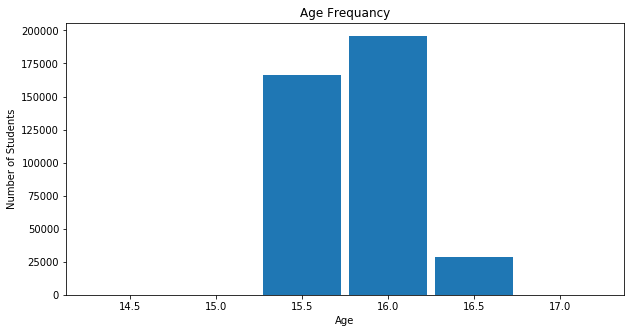

In [33]:
plt.figure(figsize = [10, 5])
bin_edges = np.arange(PISA_df['AGE'].min()-1, PISA_df['AGE'].max()+1, 0.5)
plt.hist(data = PISA_df, x = 'AGE', rwidth=0.9,bins=bin_edges)
plt.title('Age Frequancy')
plt.xlabel('Age')
plt.ylabel('Number of Students')


> This figure shows that the students age is between 15 and 16 years old and the meesurity of the students took this exam on exactly 16 years old this attibute alone will not lead to any observation, I think I will use it with other attributes 

========================================================================================
### Students Grade in Math

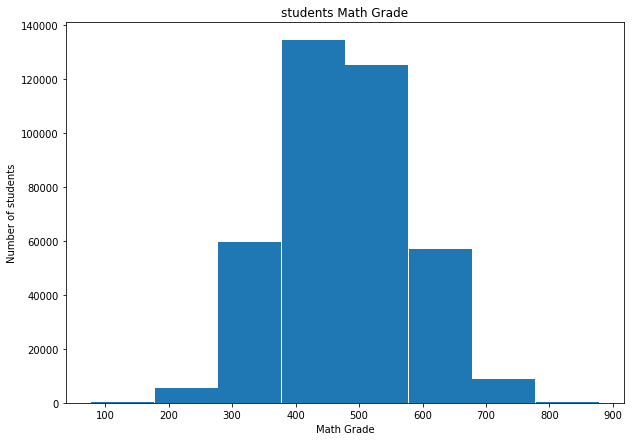

In [34]:
plt.figure(figsize = [10, 7])
bin_edges = np.arange(PISA_df['Math_Grade'].min()-1,PISA_df['Math_Grade'].max() + 1, 100)
plt.hist(PISA_df['Math_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Math Grade');
plt.ylabel('Number of students')
plt.title("students Math Grade");

> This figure shows that most students get 400 average scores in Math 

========================================================================================
### Students Grade in Reading

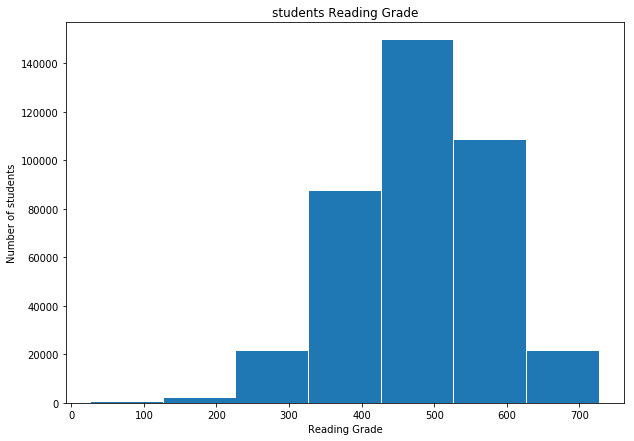

In [35]:
plt.figure(figsize = [10, 7])
bin_edges = np.arange(PISA_df['Reading_Grade'].min()-1,PISA_df['Reading_Grade'].max() + 1, 100)
plt.hist(PISA_df['Reading_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Reading Grade');
plt.ylabel('Number of students')
plt.title("students Reading Grade");

> This figure shows that most students get 500 average scores in Reading 

========================================================================================
### Students Grade in Science

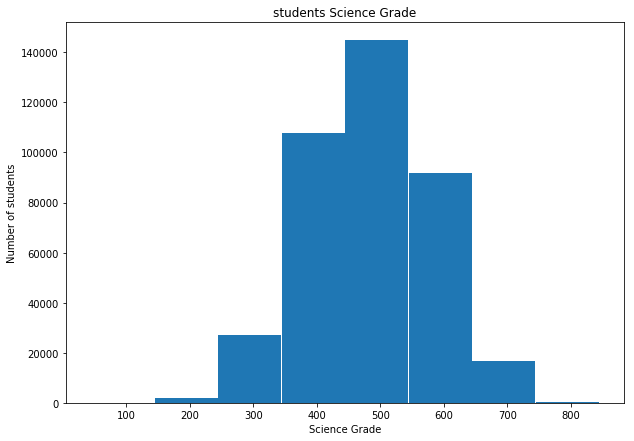

In [44]:
plt.figure(figsize = [10, 7])
bin_edges = np.arange(PISA_df['Science_Grade'].min()-1,PISA_df['Science_Grade'].max() + 1, 100)
plt.hist(PISA_df['Science_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Science Grade');
plt.ylabel('Number of students')
plt.title("students Science Grade");


>This figure shows that most students get 500 average scores in Science, 

> it seams that Math has the lowest average grade between all the tests among all students 

========================================================================================
###   Students' Gender

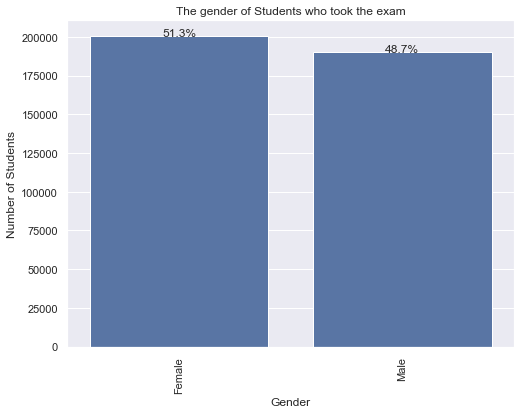

In [180]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = PISA_df, x = 'Gender',color = base_color)
sb.set(rc={'figure.figsize':(5,5)})
# add annotations
n_points = PISA_df.shape[0]
counts = PISA_df['Gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    # get the text property 
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.xticks(rotation = 90)
    # print the annotation 
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.ylabel('Number of Students')
    plt.xlabel('Gender')
    plt.title('The gender of Students who took the exam')

> there are more female Students who took the exam than Male Students 

========================================================================================
### Frequency  Students' of Father and Mother Schooling

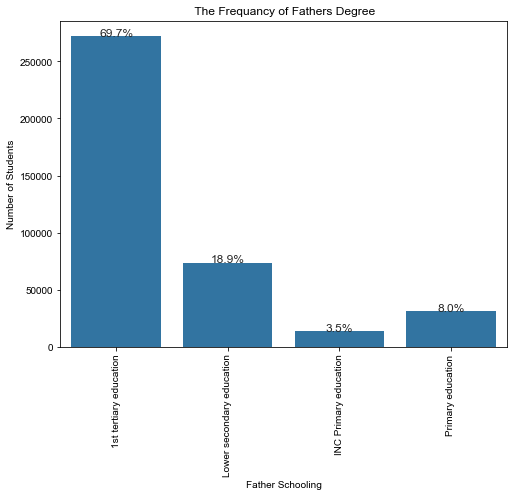

In [37]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = PISA_df, x = 'Father_Schooling',color = base_color)
sb.set(rc={'figure.figsize':(5,5)})
# add annotations
n_points = PISA_df.shape[0]
counts = PISA_df['Father_Schooling'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    # get the text property 
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.xticks(rotation = 90)
    # print the annotation 
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.ylabel('Number of Students')
    plt.xlabel('Father Schooling')
    plt.title(' The Frequancy of Fathers Degree')

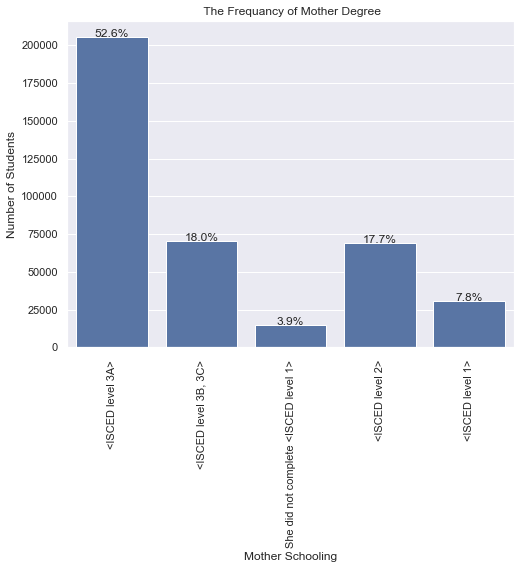

In [38]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = PISA_df, x = 'Mother_Schooling',color = base_color)
sb.set(rc={'figure.figsize':(5,5)})
# add annotations
n_points = PISA_df.shape[0]
counts = PISA_df['Mother_Schooling'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):

    # get the text property 
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.xticks(rotation = 90)
    # print the annotation 
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.ylabel('Number of Students')
    plt.xlabel('Mother Schooling')
    plt.title(' The Frequancy of Mother Degree')

> Mothers have a higher percentage of tertiary education than Fathers, with 77.4 and 74.4 respectively. This will be interesting if I found a relation between the student score and their parents schooling 

========================================================================================
### Number of Students per Country

Text(0.5, 1.0, ' The Frequancy of Fathers Degree')

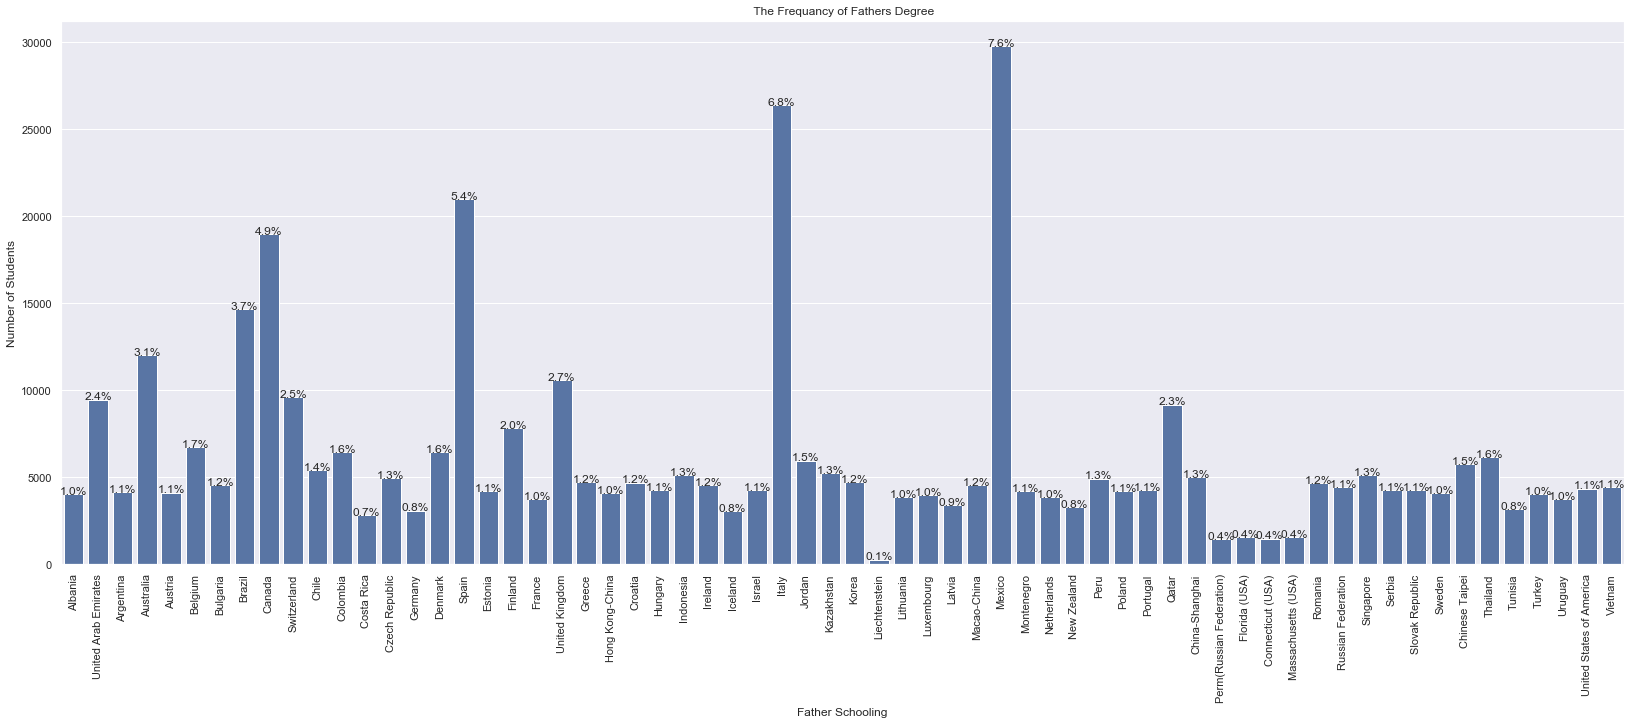

In [39]:
plt.figure(figsize = [28,10])
base_color = sb.color_palette()[0]
sb.countplot(data = PISA_df, x = 'country',color = base_color)
sb.set(rc={'figure.figsize':(5,5)})
# add annotations
n_points = PISA_df.shape[0]
counts = PISA_df['country'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.xticks(rotation = 90)
    plt.text(loc, count-8, pct_string, ha = 'center')
    
plt.ylabel('Number of Students')
plt.xlabel('Father Schooling')
plt.title(' The Frequancy of Fathers Degree')

> This figure shows the frequency of students per country. It is clear that Mexico ha the highest number with 7% of students followed by Italy and Spain with 6.8 and 5.4% respectively.

========================================================================================
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables 

### Frequency  Students' Math Grade per Country

In [40]:
Math_Grade=PISA_df[PISA_df['Math_Grade']>600].Math_Grade

In [59]:
MG_country=PISA_df[PISA_df['Math_Grade']>600]

In [60]:
MG_country.head()

,country,Student_ID,International_Grade,B_Month,B_Year,Gender,Attend,AGE,Mother_Schooling,Father_Schooling,Father_Contry_of_Birth,Mother_Contry_of_Birth,GRADE,Math_Grade,Reading_Grade,Science_Grade,Repeat,Father_Mother_Schooling
39,Albania,40,10,7,1996,Female,Yes,15.75,<ISCED level 3A>,1st tertiary education,Albania,Albania,0.0,605.00856,589.38206,532.48788,0,Different Schooling
457,Albania,458,10,4,1996,Male,Yes,16.00,<ISCED level 2>,Lower secondary education,Albania,Albania,0.0,609.83800,626.06028,588.53038,0,Different Schooling
531,Albania,532,10,3,1996,Female,Yes,16.08,<ISCED level 3A>,1st tertiary education,Albania,Albania,0.0,613.42108,639.34414,603.26370,1,Different Schooling
710,Albania,711,10,6,1996,Female,Yes,15.83,"<ISCED level 3B, 3C>",1st tertiary education,Albania,Albania,0.0,644.42278,549.74598,552.90936,0,Different Schooling
779,Albania,780,9,11,1996,Male,Yes,15.42,<ISCED level 3A>,1st tertiary education,Albania,Albania,-1.0,616.38106,553.80502,599.99998,0,Different Schooling


In [42]:
PISA_df['Math_Grade'].max()

903.10796

Text(0.5, 1.0, 'Frequency Students Math Grade per Country')

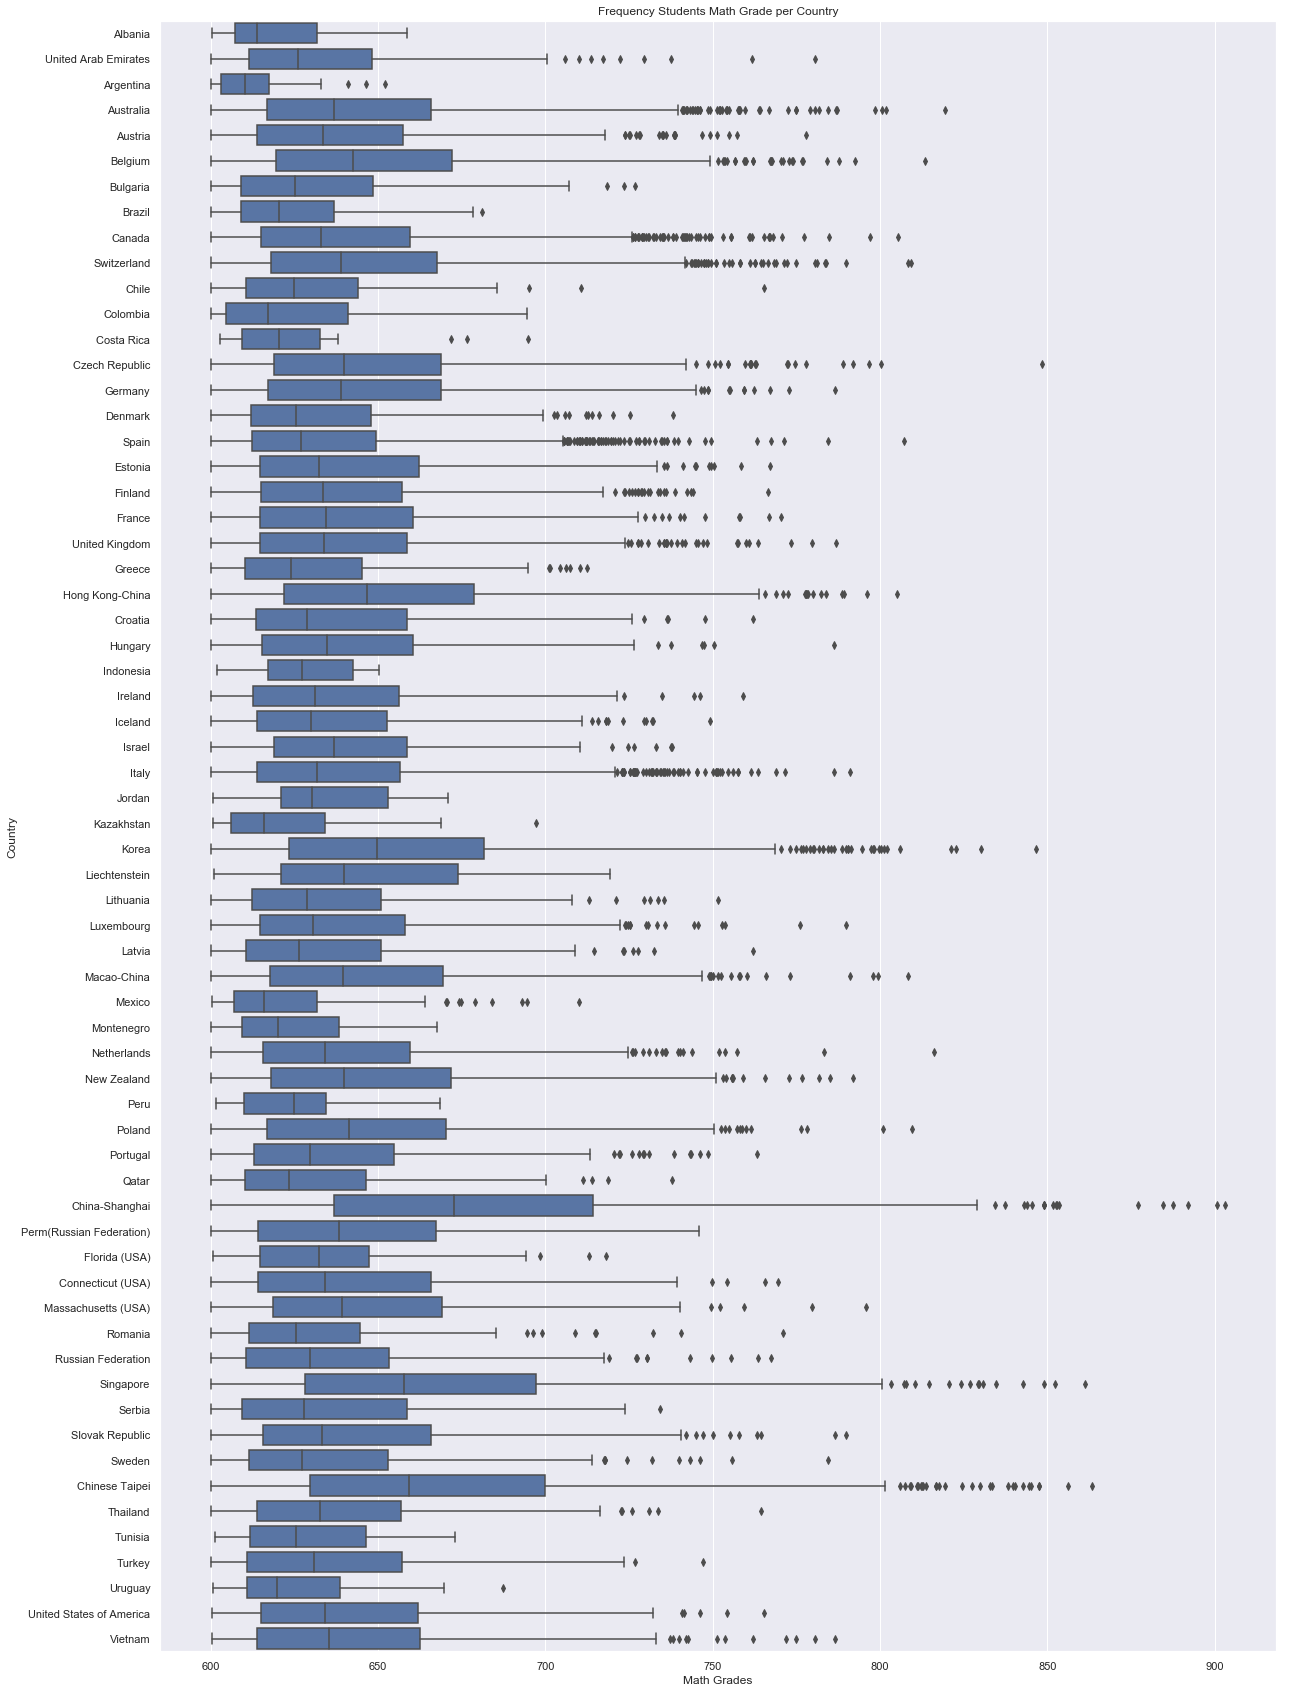

In [151]:
plt.figure(figsize=(20,30))
sb.boxplot(data = PISA_df, x = Math_Grade, y = MG_country.country, color = base_color)
plt.ylabel('Country')
plt.xlabel('Math Grades')
plt.title('Frequency Students Math Grade per Country')

> This plot shows Math grades among all the countries ,it seams that both China-Taipei and China-Shanghai and Singaphore have the 3 highrst score among all countries. although the percentage of students who took the exan on these countries ar not as high as Mixeco and Italy 

In [80]:
MG_country_top3=MG_country[(MG_country['country']=='Chinese Taipei')|(MG_country['country']=='China-Shanghai')|(MG_country['country']=='Singapore')]

Text(0.5, 1.0, 'Frequency Students Math Grade for the Top 3 Countries')

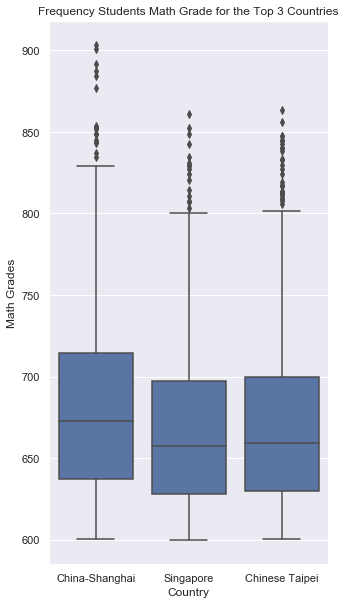

In [152]:
plt.figure(figsize=(5,10))
sb.boxplot(data = PISA_df, y = Math_Grade, x = MG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Math Grade for the Top 3 Countries')


> in this Figure I plot the highest 3 Countries in terms of Math Grades we clearly see that China-Shanghai  has the highest Math grade followed by China-Taipei 

========================================================================================

### Frequency  Students' Reading Grade per Country

In [128]:
Reading_Grade=PISA_df[PISA_df['Reading_Grade']>600].Reading_Grade

In [129]:
RG_country=PISA_df[PISA_df['Reading_Grade']>600]

Text(0.5, 1.0, 'Frequency Students Reading Grade per Country')

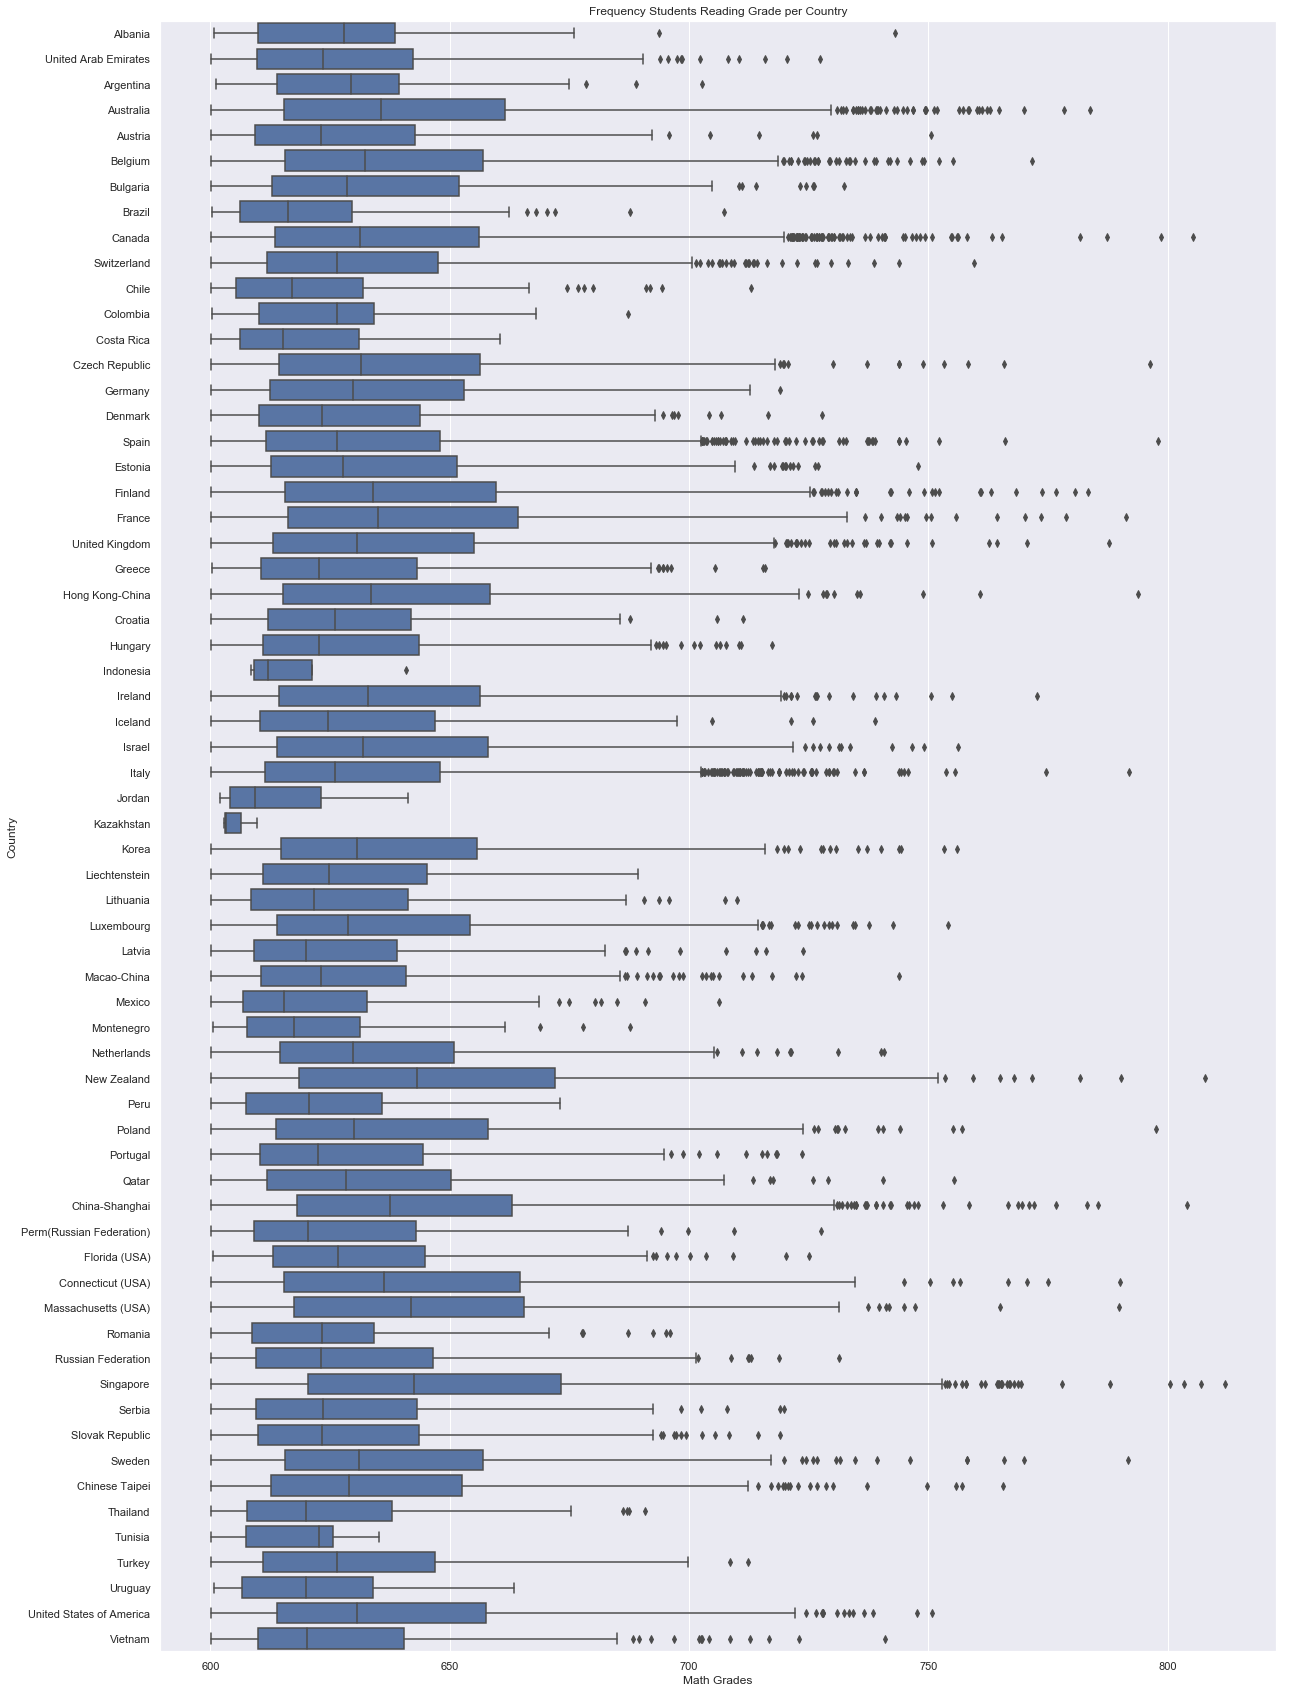

In [153]:
plt.figure(figsize=(20,30))
sb.boxplot(data = PISA_df, x = Reading_Grade, y = RG_country.country, color = base_color)
plt.ylabel('Country')
plt.xlabel('Math Grades')
plt.title('Frequency Students Reading Grade per Country')


> this Figure shows the Students grade in Reading among all countries. Unlike Math, Grade Singapore has the highest Grade in Reading where it is the 3rd highest in Math. Where new Zealand has the second-highest degree. 
we can also notice that chines student are not doing in Reading as good ad Math 

In [142]:
RG_country_top3=RG_country[(RG_country['country']=='Singapore')|(RG_country['country']=='New Zealand')|(RG_country['country']=='Connecticut (USA)')]

Text(0.5, 1.0, 'Frequency Students Reading Grade for top 3 Countries')

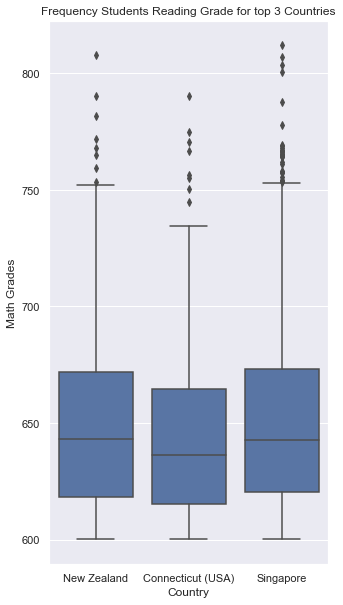

In [154]:
plt.figure(figsize=(5,10))
sb.boxplot(data = PISA_df, y = Reading_Grade, x = RG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Reading Grade for top 3 Countries')


>in this Figure I plot the highest 3 Countries in terms of Reading Grades. there not much difference between Singapore and New Zealand.

========================================================================================

### Frequency  Students' Science Grade per Country

In [155]:
Science_Grade=PISA_df[PISA_df['Science_Grade']>600].Reading_Grade

In [156]:
SG_country=PISA_df[PISA_df['Science_Grade']>600]

Text(0.5, 1.0, 'Frequency Students Science Grade per Country')

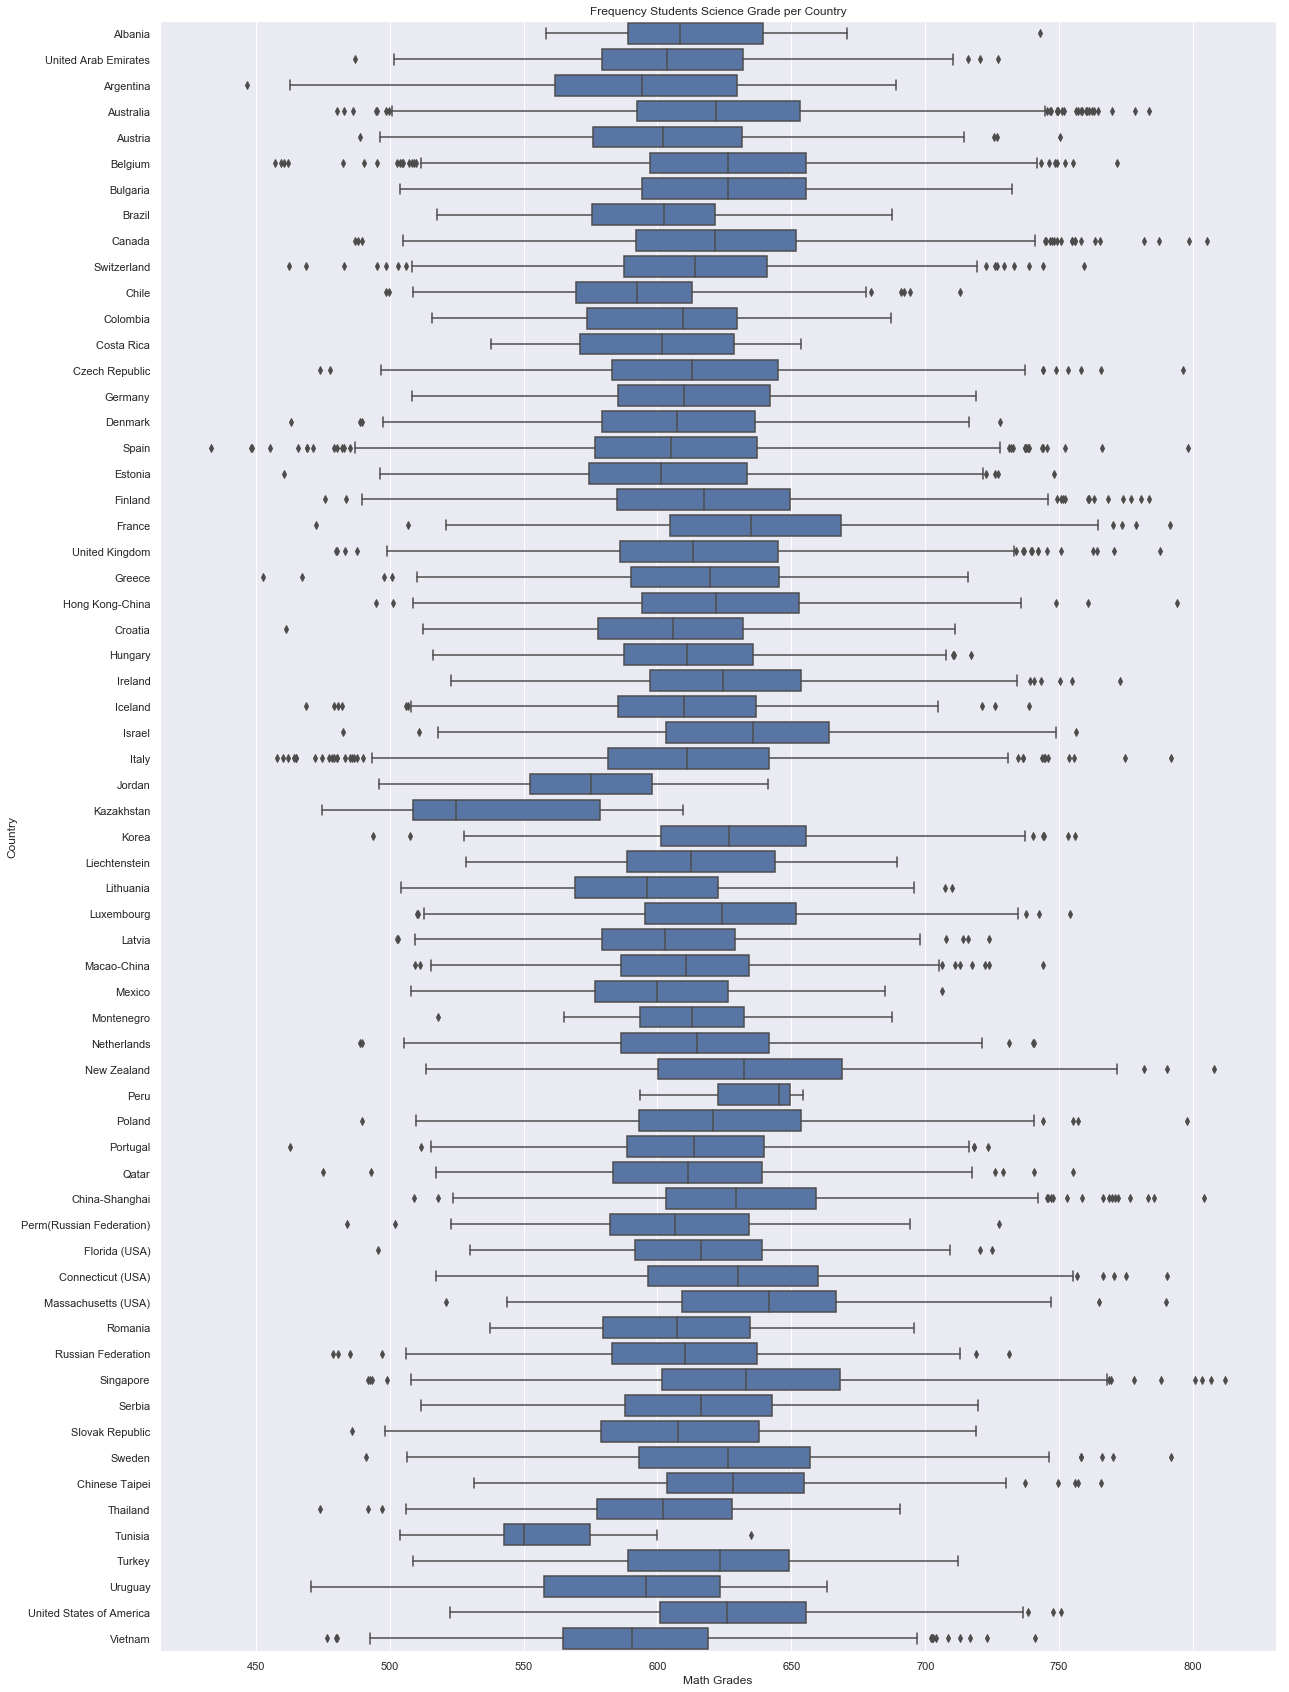

In [160]:
plt.figure(figsize=(20,30))
sb.boxplot(data = PISA_df, x = Science_Grade, y = SG_country.country, color = base_color)
plt.ylabel('Country')
plt.xlabel('Math Grades')
plt.title('Frequency Students Science Grade per Country')

> This Figure shows the students grades in Science, unlike Math and Reading grades, Most of the countries belonging to the same rand of grades. Kazakhstan has the lowest grade among all countries. France, Singapore, and New Zeland have the highest 3 scores in Science

In [168]:
SG_country_top3=SG_country[(SG_country['country']=='Singapore')|(SG_country['country']=='New Zealand')|(SG_country['country']=='France')]

Text(0.5, 1.0, 'Frequency Students Science Grade for top 3 Countries')

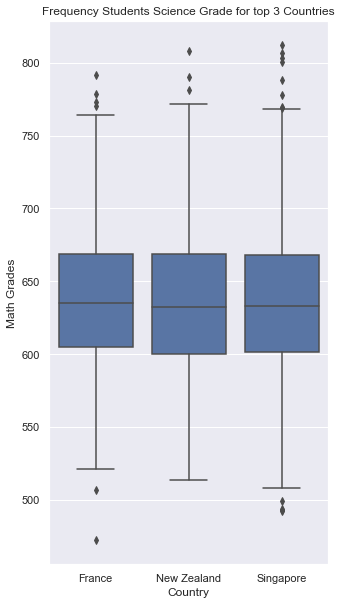

In [171]:
plt.figure(figsize=(5,10))
sb.boxplot(data = PISA_df, y = Science_Grade, x = SG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Science Grade for top 3 Countries')


>in this Figure I plot the highest 3 Countries in terms of Science Grades. there not much difference the top 3 contries

> After analyzing the 3 main test Math, Reading and Science, I found that :
* Chines Students got high grades only on Math 
* while New Zealander's students were doing better in Reading and Science 
* Singaporean's students appear to be on top 3 countries in all test types 

========================================================================================
## Multivariate Exploration

### Male and Female Scoure 

Text(0, 0.5, 'Science Grades')

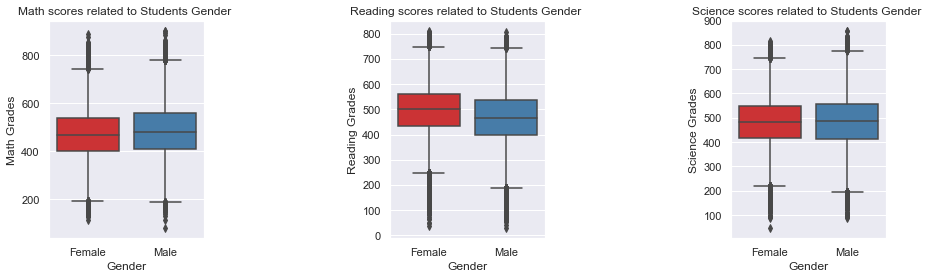

In [188]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)


plt.subplot(1, 3, 1)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Math_Grade'], palette = 'Set1')
plt.title('Math scores related to Students Gender ');
plt.ylabel('Math Grades')

plt.subplot(1, 3, 2)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Reading_Grade'], palette = 'Set1')
plt.title('Reading scores related to Students Gender ');
plt.ylabel('Reading Grades')

plt.subplot(1, 3, 3)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Science_Grade'], palette = 'Set1')
plt.title('Science scores related to Students Gender ');
plt.ylabel('Science Grades')


> in this figure I investigated if the gender will make any difference in students grades om different tests. It seems that Male students have higher grades than Female students, while in Reading Female Students have higher scores. on the other hand, both genders have almost the same scores in Science


### Conclusions

This analysis answer the following questions : 

which countries have the highest students score in Math, Reading, and Science? 

I found that China has the highest score in Math only while Singapore has the highest score in all tests. New Zealand has a high score on Reading and Science only.


Dose students from different gender perform differently on a test?  

It seems that Male students have higher grades than Female students, while in Reading Female Students have higher scores. on the other hand, both genders have almost the same scores in Science